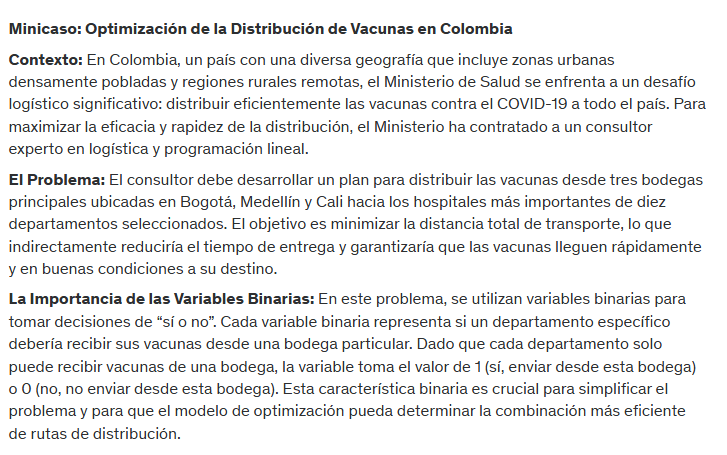

# Instalación

In [1]:
!pip install -q pyomo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00


In [2]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

# Librerías

In [47]:
import pandas as pd
import numpy as np
import pyomo.environ as pyo

# Datos del problema

In [48]:
# Define las bodegas y los departamentos

bodegas = ['Bogotá', 'Medellín', 'Cali']

In [49]:
departamentos = [

    'Antioquia',      # Medellín

    'Valle del Cauca',  # Cali

    'Cundinamarca',   # Bogotá

    'Santander',      # Bucaramanga

    'Tolima',         # Ibagué

    'Caldas',         # Manizales

    'Huila',          # Neiva

    'Meta',           # Villavicencio

    'Nariño',         # Pasto

    'Quindío'         # Armenia

]

In [50]:
# Define las distancias entre las bodegas y los departamentos

Distancias = {

    ('Bogotá', 'Antioquia'): 247,

    ('Bogotá', 'Valle del Cauca'): 300,

    ('Bogotá', 'Cundinamarca'): 0,

    ('Bogotá', 'Santander'): 299,

    ('Bogotá', 'Tolima'): 130,

    ('Bogotá', 'Caldas'): 166,

    ('Bogotá', 'Huila'): 230,

    ('Bogotá', 'Meta'): 72,

    ('Bogotá', 'Nariño'): 518,

    ('Bogotá', 'Quindío'): 177,

    ('Cali', 'Antioquia'): 330,

    ('Cali', 'Valle del Cauca'): 0,

    ('Cali', 'Cundinamarca'): 300,

    ('Cali', 'Santander'): 556,

    ('Cali', 'Tolima'): 180,

    ('Cali', 'Caldas'): 213,

    ('Cali', 'Huila'): 147,

    ('Cali', 'Meta'): 330,

    ('Cali', 'Nariño'): 261,

    ('Cali', 'Quindío'): 154,

    ('Medellín', 'Antioquia'): 0,

    ('Medellín', 'Valle del Cauca'): 330,

    ('Medellín', 'Cundinamarca'): 247,

    ('Medellín', 'Santander'): 288,

    ('Medellín', 'Tolima'): 204,

    ('Medellín', 'Caldas'): 131,

    ('Medellín', 'Huila'): 370,

    ('Medellín', 'Meta'): 319,

    ('Medellín', 'Nariño'): 591,

    ('Medellín', 'Quindío'): 190

}

# instancia del modelo

In [64]:
modelo = pyo.ConcreteModel()
modelo.dual = pyo.Suffix(direction = pyo.Suffix.IMPORT)

# Variables de decisión

Serían 1 para definir envío de la Vacuna de la bodega (i) al departamento (j).  Solo se puede enviar vacunas de una única bodega a un único departamento.

In [65]:
# Variables binarias
modelo.x = pyo.Var(bodegas, departamentos, domain = pyo.Binary)

In [66]:
modelo.x.display()

x : Size=30, Index={Bogotá, Medellín, Cali}*{Antioquia, Valle del Cauca, Cundinamarca, Santander, Tolima, Caldas, Huila, Meta, Nariño, Quindío}
    Key                             : Lower : Value : Upper : Fixed : Stale : Domain
            ('Bogotá', 'Antioquia') :     0 :  None :     1 : False :  True : Binary
               ('Bogotá', 'Caldas') :     0 :  None :     1 : False :  True : Binary
         ('Bogotá', 'Cundinamarca') :     0 :  None :     1 : False :  True : Binary
                ('Bogotá', 'Huila') :     0 :  None :     1 : False :  True : Binary
                 ('Bogotá', 'Meta') :     0 :  None :     1 : False :  True : Binary
               ('Bogotá', 'Nariño') :     0 :  None :     1 : False :  True : Binary
              ('Bogotá', 'Quindío') :     0 :  None :     1 : False :  True : Binary
            ('Bogotá', 'Santander') :     0 :  None :     1 : False :  True : Binary
               ('Bogotá', 'Tolima') :     0 :  None :     1 : False :  True : Binary
      

# Restricciones

Cada departamento puede recibir vacunas de una única bodega, pero cada bodega puede enviar vacunas a más de un departamento

In [67]:
modelo.envio = pyo.ConstraintList()

# el departamento (j)  solo puede recibir vacunas de una sola bodega (i) por eso la suma es igual a 1
for j in departamentos:
    modelo.envio.add(
       sum(modelo.x[i,j] for i in bodegas) == 1
    )


# FO

Las variables de decisión se multiplican por las respectivas distancias entre bodegas y departamentos para minimizar la distancia de los envíos de vacunas

In [68]:
dist_fo = []

for i in bodegas:
    for j in departamentos:
        dist_fo.append(Distancias[i,j]*modelo.x[i,j])

modelo.objetivo = pyo.Objective(
    expr = sum(dist_fo),
    sense = pyo.minimize
)

In [69]:
solucion = pyo.SolverFactory('glpk').solve(modelo)

In [70]:
solucion.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1183.0
  Upper bound: 1183.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 30
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.004975795745849609
# ----------------------------------------------------------
#   Solution Information
# -------------------------------

# Resultados

In [71]:
resultados = {
    'Bodega':[],
    'Departamento':[],
    'Decisión':[],
    'km':[]
}
print(f"Distancia total {modelo.objetivo ():,.0f} km\n")
print("1: Sí envía, 0: No envía\n")
for i in bodegas:
    for j in departamentos:
        if modelo.x[i,j]() >= 0:
            print(f"La bodega de [{i}] debe enviar vacunas al departamente [{j}]?: {modelo.x[i,j]():,.0f}")

            resultados['Bodega'].append(i)
            resultados['Departamento'].append(j)
            resultados['Decisión'].append(modelo.x[i,j]())

            if modelo.x[i,j]() == 1:
              resultados['km'].append(Distancias[i,j]*modelo.x[i,j]())
            else:
              resultados['km'].append(np.nan)

resultados = pd.DataFrame(resultados )

Distancia total 1,183 km

1: Sí envía, 0: No envía

La bodega de [Bogotá] debe enviar vacunas al departamente [Antioquia]?: 0
La bodega de [Bogotá] debe enviar vacunas al departamente [Valle del Cauca]?: 0
La bodega de [Bogotá] debe enviar vacunas al departamente [Cundinamarca]?: 1
La bodega de [Bogotá] debe enviar vacunas al departamente [Santander]?: 0
La bodega de [Bogotá] debe enviar vacunas al departamente [Tolima]?: 1
La bodega de [Bogotá] debe enviar vacunas al departamente [Caldas]?: 0
La bodega de [Bogotá] debe enviar vacunas al departamente [Huila]?: 0
La bodega de [Bogotá] debe enviar vacunas al departamente [Meta]?: 1
La bodega de [Bogotá] debe enviar vacunas al departamente [Nariño]?: 0
La bodega de [Bogotá] debe enviar vacunas al departamente [Quindío]?: 0
La bodega de [Medellín] debe enviar vacunas al departamente [Antioquia]?: 1
La bodega de [Medellín] debe enviar vacunas al departamente [Valle del Cauca]?: 0
La bodega de [Medellín] debe enviar vacunas al departamente [

In [72]:
resultados_decision = pd.pivot_table(
    resultados,
    index ='Bodega' ,
    columns = 'Departamento',
    values = 'Decisión',
    aggfunc = 'sum'
)

display(resultados_decision)

Departamento,Antioquia,Caldas,Cundinamarca,Huila,Meta,Nariño,Quindío,Santander,Tolima,Valle del Cauca
Bodega,,,,,,,,,,
Bogotá,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Cali,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
Medellín,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
# prompt: me gustaria que al imprimir en consola mi dataframe de pandas llamado 'resultados', las celdas que tengas valores iguales a 1 se pinten el fondo de verde y la fuente se mantenga en blanco y las que tengas valores de ceros se mantengan en color blanco, cómo puedo hacer esto? muestrame si pandas tiene opciones para modificar el formato en el que se visualiza un dataframe por favor

def color_negative_red(val):
  """
  Takes a scalar and returns a string with
  the css property `'color: red'` for negative
  strings, black otherwise.
  """
  color = 'lightgreen' if val == 1 else 'white'
  return 'background-color: %s' % color

resultados_estilizado = resultados_decision.astype(int).style.applymap(color_negative_red)
display(resultados_estilizado)

<ipython-input-73-2e3abd991a53>:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  resultados_estilizado = resultados_decision.astype(int).style.applymap(color_negative_red)


Departamento,Antioquia,Caldas,Cundinamarca,Huila,Meta,Nariño,Quindío,Santander,Tolima,Valle del Cauca
Bodega,,,,,,,,,,
Bogotá,0,0,1,0,1,0,0,0,1,0
Cali,0,0,0,1,0,1,1,0,0,1
Medellín,1,1,0,0,0,0,0,1,0,0


In [82]:
resultados_km = pd.pivot_table(
    resultados,
    index ='Bodega' ,
    columns = 'Departamento',
    values = 'km',
    aggfunc = 'mean',
    dropna = False
)

display(resultados_km)

Departamento,Antioquia,Caldas,Cundinamarca,Huila,Meta,Nariño,Quindío,Santander,Tolima,Valle del Cauca
Bodega,,,,,,,,,,
Bogotá,NaN,NaN,0.0,NaN,72.0,NaN,NaN,NaN,130.0,NaN
Cali,NaN,NaN,NaN,147.0,NaN,261.0,154.0,NaN,NaN,0.0
Medellín,0.0,131.0,NaN,NaN,NaN,NaN,NaN,288.0,NaN,NaN


In [96]:
def color_negative_red(val):
  """
  Takes a scalar and returns a string with
  the css property `'color: red'` for negative
  strings, black otherwise.
  """
  color = 'lightgreen' if val >= 0 else 'white'
  return 'background-color: %s' % color

resultados_estilizado = resultados_km.astype(float).style.applymap(color_negative_red)
display(resultados_estilizado)

<ipython-input-96-5ac3988c6b05>:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  resultados_estilizado = resultados_km.astype(float).style.applymap(color_negative_red)


Departamento,Antioquia,Caldas,Cundinamarca,Huila,Meta,Nariño,Quindío,Santander,Tolima,Valle del Cauca
Bodega,,,,,,,,,,
Bogotá,nan,nan,0.000000,nan,72.000000,nan,nan,nan,130.000000,nan
Cali,nan,nan,nan,147.000000,nan,261.000000,154.000000,nan,nan,0.000000
Medellín,0.000000,131.000000,nan,nan,nan,nan,nan,288.000000,nan,nan
